In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [4]:
local_df = pd.read_csv("../measurements/local_long/map.csv")
map_df = pd.read_csv("../measurements/real_bw_test_15fps/map.csv")
cha_df = pd.read_csv("../measurements/real_bw_test_15fps/characteristic.csv")
mag_df = pd.read_csv("../measurements/real_bw_test_15fps/manager.csv")
static_map_df = pd.read_csv("../measurements/static_test_98/map.csv")
static_cha_df = pd.read_csv("../measurements/static_test_98/characteristic.csv")

static_low_map_df = pd.read_csv("../measurements/static_test_50/map.csv")
static_low_cha_df = pd.read_csv("../measurements/static_test_50/characteristic.csv")

In [5]:
map_df.head()

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,feasible,sensitivity,map
0,0.25,1,2,6000000.0,0.3,1,-1,0.500000,0.500000
1,0.20,60,1,6000000.0,0.3,2,-1,0.333333,0.250000
2,0.25,3,3,6000000.0,0.3,3,-1,0.500000,0.500000
3,0.05,2,2,6000000.0,0.3,4,-1,0.600000,0.458333
4,0.05,5,2,6000000.0,0.3,5,-1,0.800000,0.708333


In [6]:
quality_level = []

for q in map_df["quality"]:
    if q>50:
        quality_level.append((q-50)/10)
    else:
        quality_level.append(q)

map_df["quality_level"] = quality_level

In [7]:
drop_temp = map_df["drop"].to_numpy()
drop_temp[drop_temp>0.4] =0.4
map_df["drop"] = drop_temp

# mAP drop

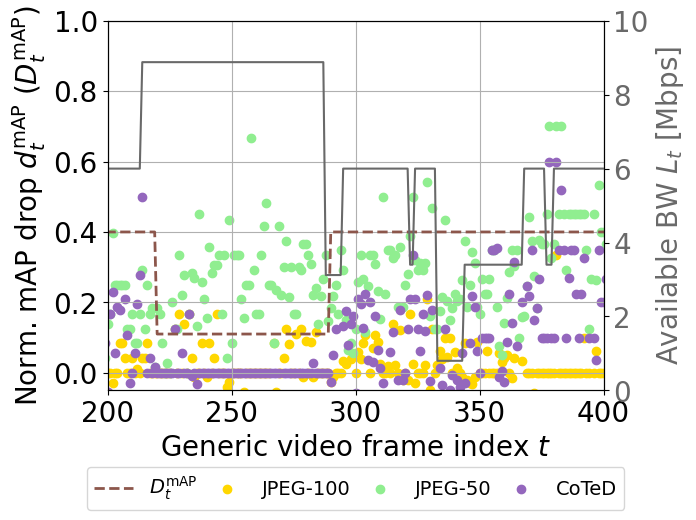

In [8]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel(r'Norm. mAP drop $d^{\text{mAP}}_t$ ($D^{\text{mAP}}_t$)')
# ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(map_df["frame_id"].to_numpy(),map_df["drop"].to_numpy(), linestyle='--', linewidth=2,color="tab:brown",label=r"$D^{\text{mAP}}_t$" )

drops2 = (local_df["map"].to_numpy() - static_map_df["map"].to_numpy())
ax1.scatter(static_map_df["frame_id"].to_numpy(),drops2,label="JPEG-100", color="gold")
drops3 = (local_df["map"].to_numpy() - static_low_map_df["map"].to_numpy())
ax1.scatter(static_low_map_df["frame_id"].to_numpy(),drops3,label="JPEG-50", color="lightgreen")
drops = (local_df["map"].to_numpy() - map_df["map"].to_numpy())
ax1.scatter(map_df["frame_id"].to_numpy(),drops,label="CoTeD", color="tab:purple")
# plt.axhline(y=10, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")

ax2 = ax1.twinx() 
color = 'dimgray'
ax2.set_ylabel('Available BW $L_t$ [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend()
ax1.set_xlim([200, 400])
ax1.set_ylim([-0.05,1])
ax2.set_ylim([0,10])
ax1.grid()
ax1.legend(ncol=4,loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=14, columnspacing=0.5)

# plt.autoscale(axis="x",tight=True)
plt.savefig("../figures/map_drop_compare.pdf", bbox_inches='tight')

In [9]:
temp1= (local_df["map"].to_numpy() - static_low_map_df["map"].to_numpy()) - map_df["drop"].to_numpy()
temp1 = temp1[200:400]
len(temp1[temp1>0])/len(temp1)

0.415

In [10]:
temp2= (local_df["sensitivity"].to_numpy() - static_low_map_df["sensitivity"].to_numpy()) - map_df["drop"].to_numpy()
temp2 = temp2[200:400]
len(temp2[temp2>0])/len(temp2)

0.53

In [11]:
temp11 =  np.array(temp1>0, dtype=bool)
temp22 =  np.array(temp2>0, dtype=bool)

In [12]:
result = temp11| temp22

In [13]:
np.sum(result)/200

0.535

In [14]:
# temp  = local_df["map"].to_numpy() - static_map_df["map"].to_numpy()

# temp.std()

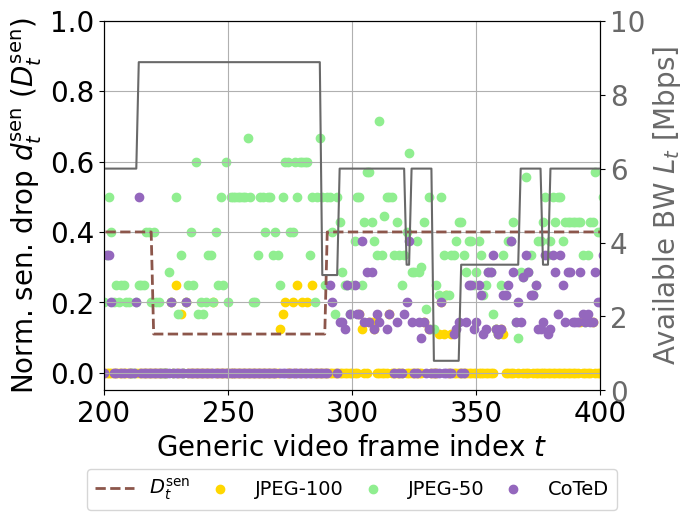

In [15]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel(r'Norm. sen. drop $d^{\text{sen}}_t$ ($D^{\text{sen}}_t$)')
# ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(map_df["frame_id"].to_numpy(),map_df["drop"].to_numpy(), linestyle='--', linewidth=2,color="tab:brown",label=r"$D^{\text{sen}}_t$" )

ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - static_map_df["sensitivity"].to_numpy()),label="JPEG-100", color= "gold")
ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - static_low_map_df["sensitivity"].to_numpy()),label="JPEG-50", color= "lightgreen")

ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy()),label="CoTeD", color= "tab:purple")
# plt.axhline(y=10, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")


ax2 = ax1.twinx() 
color = 'dimgray'
ax2.set_ylabel('Available BW $L_t$ [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend()
ax1.set_xlim([200, 400])
ax1.set_ylim([-0.05,1])
ax2.set_ylim([0,10])
ax1.grid()
ax1.legend(ncol=4,loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=14,  columnspacing=0.5)
# plt.autoscale(axis="x",tight=True)
plt.savefig("../figures/sen_drop_compare.pdf", bbox_inches='tight')

In [16]:
# temp  = local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy()

# temp.std()

In [17]:
static_cha_df

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,sparsity,decomposability,regularity,pictoriality,compression_ratio,datasize_est,datasize_real,reconstruct_snr,target_cmp,target_snr,consumed_bw
0,0,98,1,6000000.0,0.30,1,0.0,-1,-1,-1,5.640494,61362,62106,23.103039,-1,-1,8.662871e+06
1,0,98,1,6000000.0,0.30,2,0.0,-1,-1,-1,5.972494,57951,58695,0.043033,-1,-1,8.181318e+06
2,0,98,1,6000000.0,0.30,3,0.0,-1,-1,-1,5.993281,57750,58494,-5.961403,-1,-1,8.152941e+06
3,0,98,1,6000000.0,0.30,4,0.0,-1,-1,-1,6.198836,55835,56579,-9.490934,-1,-1,7.882588e+06
4,0,98,1,6000000.0,0.30,5,0.0,-1,-1,-1,5.967860,57996,58740,-11.968163,-1,-1,8.187671e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,98,1,8880000.0,0.40,446,0.0,-1,-1,-1,5.884757,58815,59559,-52.354321,-1,-1,8.303294e+06
446,0,98,1,8880000.0,0.40,447,0.0,-1,-1,-1,5.870783,58955,59699,-52.378464,-1,-1,8.323059e+06
447,0,98,1,8880000.0,0.40,448,0.0,-1,-1,-1,5.850538,59159,59903,-52.411456,-1,-1,8.351859e+06
448,0,98,1,8880000.0,0.40,449,0.0,-1,-1,-1,5.824938,59419,60163,-52.431159,-1,-1,8.388565e+06


# Bandwidth

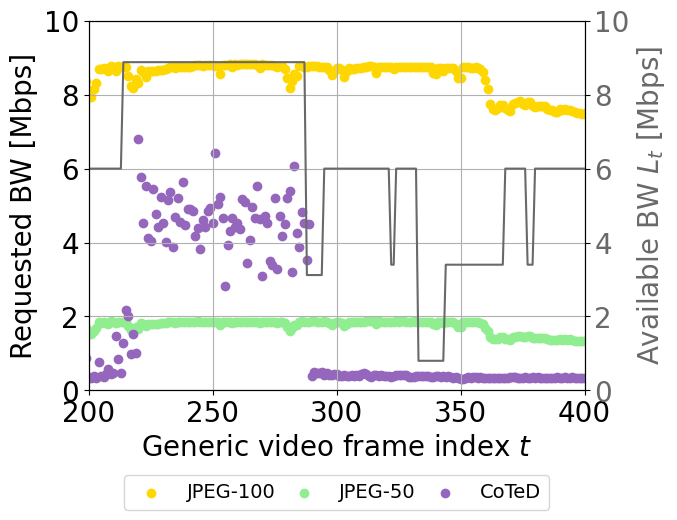

In [18]:
fig, ax1 = plt.subplots()


# feasibility = map_df["feasible"].to_numpy()
# for i in range(len(feasibility)):
#     if feasibility[i] == 1:
#         plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
#     else:
#         plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

# ax1.plot(cha_df["frame_id"].to_numpy(),cha_df["bandwidth"]/1e6,color="tab:orange",label="Available")

ax1.scatter(static_cha_df["frame_id"].to_numpy(),static_cha_df["consumed_bw"]/1e6,color="gold",label="JPEG-100")
ax1.scatter(static_cha_df["frame_id"].to_numpy(),static_low_cha_df["consumed_bw"]/1e6,color="lightgreen",label="JPEG-50")
ax1.scatter(cha_df["frame_id"].to_numpy(),cha_df["consumed_bw"]/1e6,color="tab:purple",label="CoTeD")
# plt.plot(static_cha_df["frame_id"].to_numpy(),(static_cha_df["datasize_real"]*8)/(1e6*0.01),color="tab:blue",label="Static")

ax2 = ax1.twinx() 
color = 'dimgray'
ax2.set_ylabel('Available BW $L_t$ [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_xlim([200,400])
ax1.set_ylim([0,10])
ax2.set_ylim([0,10])
ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=14,columnspacing=0.5 )
ax1.grid()
ax1.set_xlabel("Generic video frame index $t$")
ax1.set_ylabel("Requested BW [Mbps]")



# plt.autoscale(axis="x",tight=True)
plt.savefig("../figures/bandwidth_compare.pdf", bbox_inches='tight')

In [19]:
static_low_cha_df["consumed_bw"][200:400].mean()

1741680.0

In [20]:
(static_cha_df["consumed_bw"][200:400].mean() - cha_df["consumed_bw"][200:400].mean())/static_cha_df["consumed_bw"][200:400].mean() 

0.7756176872739682

In [21]:
counter = 0
for i in range(200):
    index  = i+200
    if static_low_cha_df["consumed_bw"][index]>map_df["bandwidth"][index]:
        counter+=1

In [22]:
counter

11

In [23]:
static_cha_df["consumed_bw"]

0      8.662871e+06
1      8.181318e+06
2      8.152941e+06
3      7.882588e+06
4      8.187671e+06
           ...     
445    8.303294e+06
446    8.323059e+06
447    8.351859e+06
448    8.388565e+06
449    8.371765e+06
Name: consumed_bw, Length: 450, dtype: float64

In [24]:
1-(cha_df["consumed_bw"].to_numpy().mean()/1e6)/(static_cha_df["consumed_bw"].to_numpy().mean()/1e6)

0.892773158511769